- Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
#delayed_flights = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\DelayedFlights.csv', sep=',')
delayed_flights = pd.read_csv('C:\\Users\\formacio\\Gabriel De Santis\\Datasets\\DelayedFlights.csv', sep=',')

delayed_flights

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
delayed_flights.drop(columns='Unnamed: 0', inplace=True)

Abans que res, eliminarem la variable Year ja que tots els vols del dataset son del 2008 i ens sembla redundant.

In [4]:
delayed_flights.drop(columns='Year', inplace=True)

A continuació, farem neteja de valors nuls.

Observem que els vols cancelats produeixen una gran quantitat de null values a diferents variables. Pensem que lo millor serà eliminar les files, ja que el nombre de vols cancelats és petit.

In [5]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [6]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [7]:
delayed_flights[delayed_flights.Cancelled == 1].isna().sum() / len(delayed_flights[delayed_flights.Cancelled == 1]) * 100

Month                  0.000000
DayofMonth             0.000000
DayOfWeek              0.000000
DepTime                0.000000
CRSDepTime             0.000000
ArrTime              100.000000
CRSArrTime             0.000000
UniqueCarrier          0.000000
FlightNum              0.000000
TailNum                0.000000
ActualElapsedTime    100.000000
CRSElapsedTime         0.000000
AirTime              100.000000
ArrDelay             100.000000
DepDelay               0.000000
Origin                 0.000000
Dest                   0.000000
Distance               0.000000
TaxiIn               100.000000
TaxiOut               71.879937
Cancelled              0.000000
CancellationCode       0.000000
Diverted               0.000000
CarrierDelay         100.000000
WeatherDelay         100.000000
NASDelay             100.000000
SecurityDelay        100.000000
LateAircraftDelay    100.000000
dtype: float64

In [8]:
indexes = delayed_flights[delayed_flights.Cancelled == 1].index.values

In [9]:
delayed_flights.drop(index=indexes, inplace=True)

Hem eliminat tots els vols cancelats, per tant, la variable Cancelled ja no ens aporta cap informació. Per aquest motiu, l'eliminem.

In [10]:
delayed_flights.drop(columns='Cancelled', inplace=True)

In [11]:
delayed_flights.reset_index(drop=True, inplace=True)

Sembla que els null values de les variables CarrierDelay, WeatherDelay, etc. están relacionats amb ArrDelay, és a dir, que quan el retràs no supera els 14 minuts, no es recullen valors. En aquest cas, creiem que serà convenient imputar-los per 0.

In [12]:
delayed_flights[delayed_flights.CarrierDelay.isna()].ArrDelay.max()

14.0

In [13]:
indices = delayed_flights[delayed_flights.ArrDelay < 15][['CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].index.values

In [14]:
delayed_flights.iloc[indices, -5:] = delayed_flights.iloc[indices, -5:].fillna(0)

Sembla que els vols desviats també afecten als valors nuls d'altres variables. Així que els eliminarem de la mateixa forma que els cancelats.

In [15]:
delayed_flights[delayed_flights.Diverted == 1].isna().sum() / len(delayed_flights[delayed_flights.Diverted == 1]) * 100

Month                  0.000000
DayofMonth             0.000000
DayOfWeek              0.000000
DepTime                0.000000
CRSDepTime             0.000000
ArrTime               83.531081
CRSArrTime             0.000000
UniqueCarrier          0.000000
FlightNum              0.000000
TailNum                0.025793
ActualElapsedTime    100.000000
CRSElapsedTime         2.553521
AirTime              100.000000
ArrDelay             100.000000
DepDelay               0.000000
Origin                 0.000000
Dest                   0.000000
Distance               0.000000
TaxiIn                83.531081
TaxiOut                0.000000
CancellationCode       0.000000
Diverted               0.000000
CarrierDelay         100.000000
WeatherDelay         100.000000
NASDelay             100.000000
SecurityDelay        100.000000
LateAircraftDelay    100.000000
dtype: float64

In [16]:
indices = delayed_flights[delayed_flights.Diverted == 1].index.values

In [17]:
delayed_flights.drop(index=indices, inplace=True)

In [18]:
delayed_flights.drop(columns='Diverted', inplace=True)

In [19]:
delayed_flights.reset_index(drop=True, inplace=True)

In [20]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
DepTime              0.000000
CRSDepTime           0.000000
ArrTime              0.000000
CRSArrTime           0.000000
UniqueCarrier        0.000000
FlightNum            0.000000
TailNum              0.000156
ActualElapsedTime    0.000000
CRSElapsedTime       0.000000
AirTime              0.000000
ArrDelay             0.000000
DepDelay             0.000000
Origin               0.000000
Dest                 0.000000
Distance             0.000000
TaxiIn               0.000000
TaxiOut              0.000000
CancellationCode     0.000000
CarrierDelay         0.000000
WeatherDelay         0.000000
NASDelay             0.000000
SecurityDelay        0.000000
LateAircraftDelay    0.000000
dtype: float64

Per acabar, hem decidit imputar els valors nuls de TailNum per la moda.

In [21]:
delayed_flights.TailNum.fillna(delayed_flights.TailNum.mode()[0], inplace=True)

In [22]:
delayed_flights.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CancellationCode     0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Separar les variables per tipus

In [23]:
cyclical = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
nominal = ['UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
binomial = ['Cancelled', 'Diverted']
numerical = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
            'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
           'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [24]:
delayed_flights[numerical].skew()

ActualElapsedTime     1.427101
CRSElapsedTime        1.439446
AirTime               1.495251
ArrDelay              3.948780
DepDelay              4.500579
Distance              1.546581
TaxiIn                5.989240
TaxiOut               4.497800
CarrierDelay          8.863144
WeatherDelay         15.595925
NASDelay              6.151299
SecurityDelay        64.912970
LateAircraftDelay     4.045036
dtype: float64

In [25]:
delayed_flights[numerical] = pd.DataFrame(data=np.ma.log(delayed_flights[numerical].values).filled(0), columns=numerical)
delayed_flights[numerical].skew()

ActualElapsedTime     0.133347
CRSElapsedTime        0.193822
AirTime               0.002158
ArrDelay             -0.596587
DepDelay              0.382507
Distance             -0.213776
TaxiIn                0.452935
TaxiOut               0.671148
CarrierDelay          1.190391
WeatherDelay          4.788023
NASDelay              1.364237
SecurityDelay        20.740511
LateAircraftDelay     0.916293
dtype: float64

Aplicarem cyclical transforming per a les variables ordinals, frequency encoding per a les nominals i estandarditzarem les variables numèriques. Les variables cancelled i diverted son binomials, però no requereixen cap tipus de transformació.

In [26]:
for column in cyclical[:3]:
    print(np.sort(delayed_flights[column].unique()))
    print('='*64)

for column in cyclical[3:]:
    print(delayed_flights[column].min(), delayed_flights[column].max())
    print('='*64)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[1 2 3 4 5 6 7]
1.0 2400.0
0 2359
1.0 2400.0
0 2359


In [27]:
delayed_flights['mnth_sin'] = np.sin((delayed_flights.Month -1)*(2.*np.pi/12))
delayed_flights['mnth_cos'] = np.cos((delayed_flights.Month -1)*(2.*np.pi/12))
delayed_flights['day_M_sin'] = np.sin((delayed_flights.DayofMonth -1)*(2.*np.pi/31))
delayed_flights['day_M_cos'] = np.cos((delayed_flights.DayofMonth -1)*(2.*np.pi/31))
delayed_flights['day_W_sin'] = np.sin((delayed_flights.DayOfWeek -1)*(2.*np.pi/7))
delayed_flights['day_W_cos'] = np.cos((delayed_flights.DayOfWeek -1)*(2.*np.pi/7))

In [28]:
round(delayed_flights[['Month','mnth_sin', 'mnth_cos', 'DayofMonth', 'day_M_sin', 'day_M_cos', 'DayOfWeek', 'day_W_sin', 'day_W_cos']][::200000], 3)

,Month,mnth_sin,mnth_cos,DayofMonth,day_M_sin,day_M_cos,DayOfWeek,day_W_sin,day_W_cos
0,1,0.000,1.000,3,0.394,0.919,4,0.434,-0.901
200000,2,0.500,0.866,15,0.299,-0.954,5,-0.434,-0.901
400000,3,0.866,0.500,24,-0.999,-0.051,1,0.000,1.000
600000,4,1.000,0.000,14,0.485,-0.874,1,0.000,1.000
800000,5,0.866,-0.500,20,-0.651,-0.759,2,0.782,0.623
1000000,6,0.500,-0.866,22,-0.898,-0.440,7,-0.782,0.623
1200000,7,0.000,-1.000,1,0.000,1.000,2,0.782,0.623
1400000,8,-0.500,-0.866,20,-0.651,-0.759,3,0.975,-0.223
1600000,10,-1.000,-0.000,14,0.485,-0.874,2,0.782,0.623
1800000,12,-0.500,0.866,22,-0.898,-0.440,1,0.000,1.000


In [29]:
delayed_flights['DepTime_sin'] = np.sin((delayed_flights.DepTime)*(2.*np.pi/2400))
delayed_flights['DepTime_cos'] = np.cos((delayed_flights.DepTime)*(2.*np.pi/2400))
delayed_flights['CRSDepTime_sin'] = np.sin((delayed_flights.CRSDepTime)*(2.*np.pi/2359))
delayed_flights['CRSDepTime_cos'] = np.cos((delayed_flights.CRSDepTime)*(2.*np.pi/2359))
delayed_flights['ArrTime_sin'] = np.sin((delayed_flights.ArrTime)*(2.*np.pi/2400))
delayed_flights['ArrTime_cos'] = np.cos((delayed_flights.ArrTime)*(2.*np.pi/2400))
delayed_flights['CRSArrTime_sin'] = np.sin((delayed_flights.CRSArrTime)*(2.*np.pi/2400))
delayed_flights['CRSArrTime_cos'] = np.cos((delayed_flights.CRSArrTime)*(2.*np.pi/2400))

In [30]:
delayed_flights[delayed_flights.CRSDepTime == 0][['CRSDepTime', 'CRSDepTime_sin', 'CRSDepTime_cos']]

,CRSDepTime,CRSDepTime_sin,CRSDepTime_cos
250004,0,0.0,1.0
945888,0,0.0,1.0


In [31]:
round(delayed_flights[delayed_flights.CRSDepTime == 2358][['CRSDepTime', 'CRSDepTime_sin', 'CRSDepTime_cos']], 5)

,CRSDepTime,CRSDepTime_sin,CRSDepTime_cos
81472,2358,-0.00266,1.0
82440,2358,-0.00266,1.0
82838,2358,-0.00266,1.0
89259,2358,-0.00266,1.0
89748,2358,-0.00266,1.0
...,...,...,...
1609959,2358,-0.00266,1.0
1610100,2358,-0.00266,1.0
1610180,2358,-0.00266,1.0
1611059,2358,-0.00266,1.0


Com podem observar, hem aconseguit que els valors siguin cíclics, de forma que la última hora/dia estigui a prop de la primera, que és com passa en el temps cíclic.

In [32]:
delayed_flights.drop(columns=cyclical, inplace=True)

In [33]:
cyclical = ['mnth_sin', 'mnth_cos', 'day_M_sin', 'day_M_cos', 'day_W_sin', 'day_W_cos', 'DepTime_sin', 'DepTime_cos', 'ArrTime_sin',
       'ArrTime_cos', 'CRSDepTime_sin', 'CRSDepTime_cos', 'CRSArrTime_sin',
       'CRSArrTime_cos']

In [34]:
delayed_flights[cyclical]

,mnth_sin,mnth_cos,day_M_sin,day_M_cos,day_W_sin,day_W_cos,DepTime_sin,DepTime_cos,ArrTime_sin,ArrTime_cos,CRSDepTime_sin,CRSDepTime_cos,CRSArrTime_sin,CRSArrTime_cos
0,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969,-0.862072,0.506786,-0.474856,0.880063,-0.880090,0.474807,-0.442289,0.896873
1,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969,0.919821,-0.392337,0.495459,-0.868632,0.926094,-0.377294,0.500000,-0.866025
2,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969,0.997314,-0.073238,0.860742,-0.509041,0.996756,-0.080484,0.923880,-0.382683
3,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969,-0.997119,0.075849,-0.914607,0.404344,-0.999280,-0.037946,-0.946930,0.321439
4,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969,-0.933580,0.358368,-0.667183,0.744894,-0.925590,0.378527,-0.688355,0.725374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928366,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521,-0.130526,-0.991445,-0.887413,-0.460974,-0.107662,-0.994188,-0.796530,-0.604599
1928367,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521,0.988886,-0.148672,0.699663,-0.714473,0.999627,-0.027297,0.924878,-0.380263
1928368,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521,0.484046,-0.875042,0.133121,-0.991100,0.774303,-0.632816,0.477159,-0.878817
1928369,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521,-0.133121,-0.991100,-0.600420,-0.799685,-0.160445,-0.987045,-0.581413,-0.813608


In [35]:
for column in nominal:
    mapping = delayed_flights[column].value_counts() / len(delayed_flights)
    delayed_flights[column] = delayed_flights[column].map(mapping)

In [36]:
delayed_flights[nominal]

,UniqueCarrier,FlightNum,TailNum,Origin,Dest,CancellationCode
0,0.195087,0.000373,0.000332,0.011429,0.011712,1.0
1,0.195087,0.000083,0.000334,0.011429,0.011712,1.0
2,0.195087,0.000571,0.000311,0.005016,0.015323,1.0
3,0.195087,0.000200,0.000365,0.005016,0.015323,1.0
4,0.195087,0.000639,0.000334,0.005016,0.004954,1.0
...,...,...,...,...,...,...
1928366,0.058976,0.000331,0.000230,0.016746,0.055249,1.0
1928367,0.058976,0.000212,0.000149,0.002468,0.055249,1.0
1928368,0.058976,0.000212,0.000193,0.068043,0.022625,1.0
1928369,0.058976,0.000279,0.000155,0.011429,0.055249,1.0


In [37]:
scaler = StandardScaler()
delayed_flights[numerical] = scaler.fit_transform(delayed_flights[numerical])
delayed_flights[numerical]

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.176502,0.477836,0.413230,-1.971519,-1.247490,0.429530,-0.655909,-1.158817,-0.643736,-0.217514,-0.617016,-0.052188,-0.699704
1,0.176502,0.408951,0.369975,-1.507232,-0.344573,0.429530,-0.251732,-0.757698,-0.643736,-0.217514,-0.617016,-0.052188,-0.699704
2,-0.391238,-0.560111,-0.284821,-0.203814,-1.247490,-0.167982,-1.176984,0.196150,-0.643736,-0.217514,-0.617016,-0.052188,-0.699704
3,-0.518605,-0.560111,-0.263242,0.390523,0.262858,-0.167982,-1.176984,-0.757698,-0.198431,-0.217514,-0.617016,-0.052188,1.309586
4,-0.291039,-0.062047,-0.061675,-0.365351,-0.058106,0.214145,-0.655909,-0.757698,-0.643736,-0.217514,-0.617016,-0.052188,-0.699704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928366,0.449638,0.504749,0.469194,0.184562,0.132208,0.577309,0.812917,0.298897,0.062056,-0.217514,-0.617016,-0.052188,1.092354
1928367,0.161023,-0.170924,-0.241941,0.920439,0.802199,-0.258096,1.738168,1.442139,-0.643736,5.116984,1.397736,-0.052188,-0.699704
1928368,0.641390,0.380730,0.496481,1.106403,1.156034,0.216061,0.599578,1.333162,-0.643736,-0.217514,1.435423,-0.052188,1.833521
1928369,-0.034856,-0.027013,-0.024155,-0.499765,-0.915076,-0.122655,1.478972,-0.286077,-0.643736,-0.217514,-0.617016,-0.052188,-0.699704


In [38]:
delayed_flights.columns

Index(['UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'CancellationCode', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'mnth_sin', 'mnth_cos', 'day_M_sin', 'day_M_cos', 'day_W_sin',
       'day_W_cos', 'DepTime_sin', 'DepTime_cos', 'CRSDepTime_sin',
       'CRSDepTime_cos', 'ArrTime_sin', 'ArrTime_cos', 'CRSArrTime_sin',
       'CRSArrTime_cos'],
      dtype='object')

---

Realitzarem els següents exercicis alhora, ja que és difícil segmentar el treball i fer-los un a un

- Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

- Exercici 2

Compara’ls en base al MSE i al R2 .

- Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

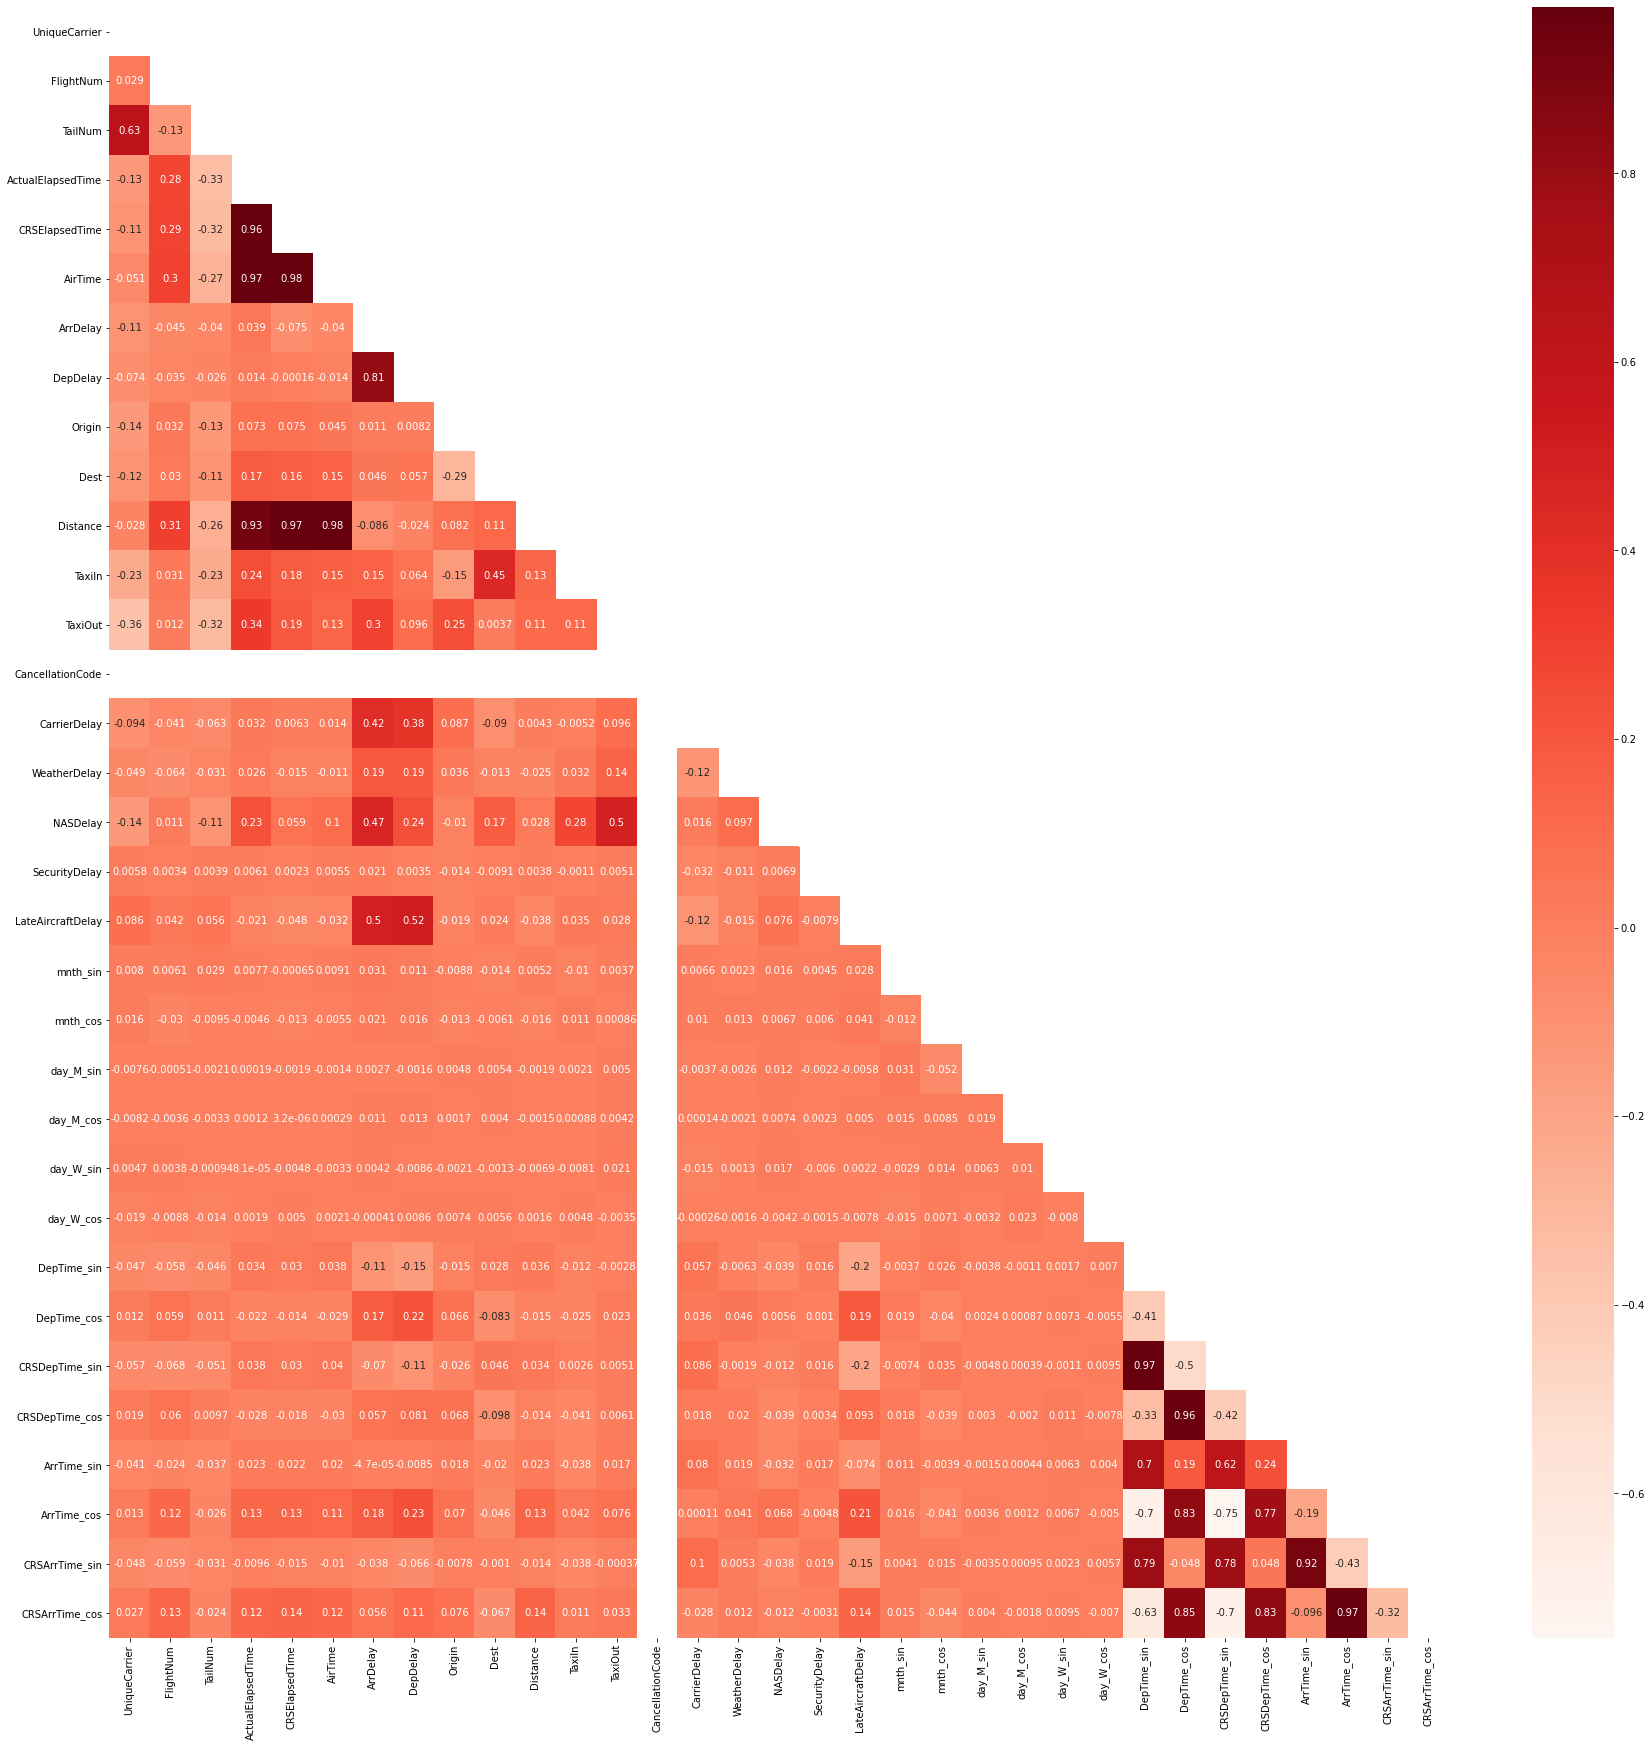

In [39]:
matrix = np.triu(delayed_flights.corr())
plt.figure(figsize=(30,30))
fig = sns.heatmap(delayed_flights.corr(), annot=True, cmap='Reds', mask=matrix)

Observant la matriu de correlacions, les variables que més ens interessen a la hora d'analitzar ArrDelay son 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay'. Aquestes variables, com es podia veure abans, segueixen mantenint un skew molt gran tot i la transformació logarítmica. Tot i així, realitzarem una regressió múltiple per tenir un baseline a partir del qual provar amb altres dos models que puguin funcionar millor davant outliers. Entre aquestes variables, a més, no sembla haver colinealitat.

In [40]:
#sample_df = delayed_flights.sample(frac=0.2)

In [41]:
#sample_df.shape

Regresión lineal múltiple

In [42]:
X = delayed_flights[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']]
y = delayed_flights['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), train_size = 0.8,
                                        random_state = 1234, shuffle = True)

In [43]:
X_train = sm.add_constant(X_train, prepend=True)
lmr = sm.OLS(endog=y_train, exog=X_train)
lmr = lmr.fit()
print(lmr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 9.236e+05
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:43:40   Log-Likelihood:            -1.2464e+06
No. Observations:             1542696   AIC:                         2.493e+06
Df Residuals:                 1542691   BIC:                         2.493e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.002e-05      0.00

El modelo con todas las variables introducidas como predictores tiene un R2 i R2adjusted notable (0.705), es capaz de explicar el 70.5% de la variabilidad observada en los retrasos. El p-value del modelo es significativo por lo que se puede aceptar que el modelo es mejor que lo esperado por azar. 

Función resultante del modelo de regressión: y = -0.00001002 + 0.50xi1 + 0.22xi2 + 0.40xi3 + 0.53xi4

In [59]:
X_test = sm.add_constant(X_test, prepend=True)
lmr_pred = lmr.predict(X_test)
MSE_lmr = mean_squared_error(y_test, lmr_pred)
print('MSE:', MSE_lmr)

MSE: 0.2947843825643521


Random Forest

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size = 0.8,
                                        random_state = 1234, shuffle = True)

In [62]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [64]:
rf_pred = rf.predict(X_test)
r2_score(y_test, rf_pred)

0.8284615703469721

In [63]:
MSE_rf = mean_squared_error(y_test, rf_pred)
print('MSE:', MSE_rf)

MSE: 0.17140641619506172


El R2 del Random Forest es superior al de la regresión lineal y consigue explicar el 83% de variabilidad. Asimismo, el MSE es menor.

Como podemos ver, el Random Forest logra superar los resultados de la regresión lineal, especialmente debido a su fortaleza ante la presencia de outliers. 

Xarxes Neuronals

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, train_size = 0.8,
                                        random_state = 1234, shuffle = True)

In [69]:
mlp = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
r2_score(y_test, mlp_pred)

0.8283635129437144

In [70]:
MSE_rf = mean_squared_error(y_test, mlp_pred)
print('MSE:', MSE_rf)

MSE: 0.17150439813478102


El R2 del modelo de redes neuronales es casi idéntico al del Random Forest (inferior por muy poco) y consigue explicar también el 83% de la variabilidad. Pasa lo mismo con el MSE.

Si tuvieramos que elegir, el Random Forest es el que presenta un mejor rendimiento.

---

- Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

LMR no hay parametros

- GridSearch